In [1]:
import os

os.chdir('..')

In [2]:
from feature_selection.core import GeneticFeatureSelector
from functools import partial
from feature_selection.visualization.avatars.image_grid import animate_grid, visualization, prepare_history_for_visualization
from IPython.display import Image
from sklearn.datasets import load_wine
from sklearn.neighbors import KNeighborsClassifier
import numpy as np

In [3]:


dataset = load_wine()
X = dataset.data[:, :11]
y = dataset.target
feature_names = dataset.feature_names[: 11]


In [4]:
def fitness_function(score, individual, alpha=0.8):
    return score * alpha + (1 - alpha) * (1 - np.sum(individual) / len(individual))

In [5]:
estimator = KNeighborsClassifier(
    n_neighbors=5
)

In [6]:
GA = GeneticFeatureSelector(
    population_size=16,
    max_iterations=25,
    crossover_method='random',
    mutation_probability=0.1,
    estimator=estimator,
    scoring='accuracy',
    fitness_function=partial(fitness_function, alpha=0.9),
    selection_method='tournament',
    max_iteration_without_improvement=10,
    tournament_size=3
)

In [7]:
GA.fit(X, y)

In [8]:
individual_mask = GA.history[0].candidate_features[0].to_mask()
individual_mask

array([ True, False,  True, False,  True,  True, False,  True,  True,
       False, False])

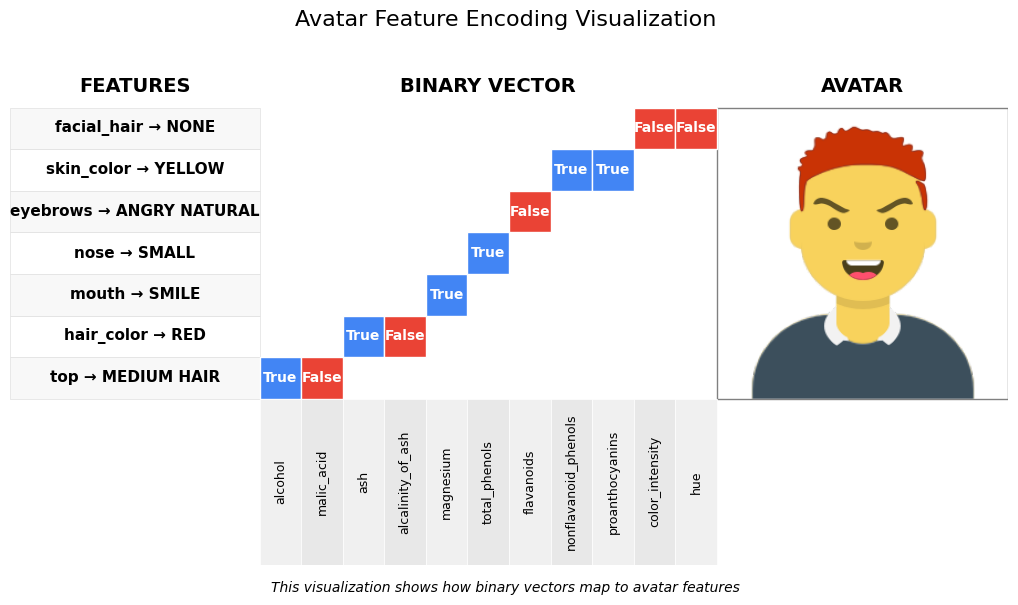

In [9]:
visualization(individual_mask, original_names=feature_names)

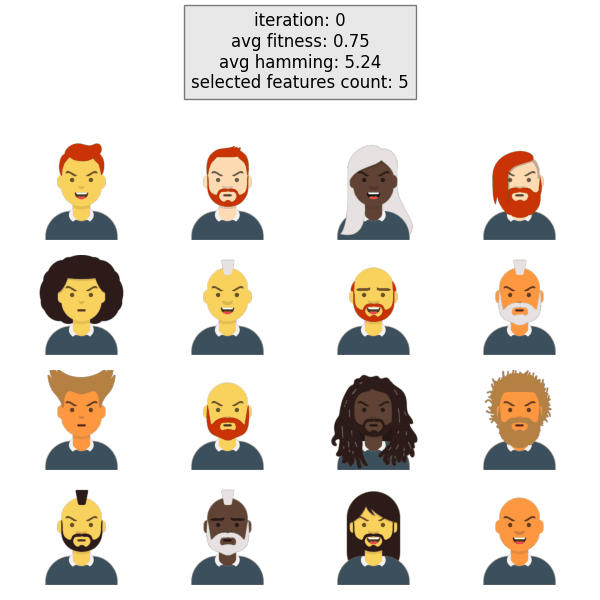

In [10]:
animate_grid(prepare_history_for_visualization(GA.history), save_path='assets/Genetic.gif')
display(Image(filename='assets/Genetic.gif'))